
You are given the data consisting of various features of houses at an unknown place. You are required to predict the sale price of the data of the houses, you may use MLR(Multi Linear regression) for this task.
> The dataset for this task can be downloaded at: https://drive.google.com/file/d/13ILRFONUoDsxuJdLseTLj3e3sHTxROGU/view?usp=share_link

> Also tell the features which affect the house pricing the most i.e. do some data analysis on the data and do so by the help by various maps like we discussed in the online meet we did. And also try some innovative ideas using the dataset that you may figure out.

> Also here is the column descriptions for the dataset:
* date : Date of transaction
* price : Price of house
* bedrooms, bathrooms : Number
* sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built
* floors : Total floors in the house
* waterfront: Whether the house is on a waterfront(1: yes, 0: no)
* view : special view?
* condition : Condition of the house
* grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow
* sqft_above,sqft_basement : Square footage of house apart from basement and basement area
* yr_built : Built year
* yr_renovated : Year when the house was renovated
* zipcode, lat, long : zip code, latitude and logtitude coordinate of the house
* sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/himanshuhy004/MachineLearning_AME/main/Assignment-2_Train_data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info() #to check if there are any non-null values missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19998 non-null  int64  
 1   date           19998 non-null  object 
 2   price          19998 non-null  float64
 3   bedrooms       19998 non-null  int64  
 4   bathrooms      19998 non-null  float64
 5   sqft_living    19998 non-null  int64  
 6   sqft_lot       19998 non-null  int64  
 7   floors         19998 non-null  float64
 8   waterfront     19998 non-null  int64  
 9   view           19998 non-null  int64  
 10  condition      19998 non-null  int64  
 11  grade          19998 non-null  int64  
 12  sqft_above     19996 non-null  float64
 13  sqft_basement  19998 non-null  int64  
 14  yr_built       19998 non-null  int64  
 15  yr_renovated   19998 non-null  int64  
 16  zipcode        19998 non-null  int64  
 17  lat            19998 non-null  float64
 18  long  

In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19996 entries, 0 to 19997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19996 non-null  int64  
 1   date           19996 non-null  object 
 2   price          19996 non-null  float64
 3   bedrooms       19996 non-null  int64  
 4   bathrooms      19996 non-null  float64
 5   sqft_living    19996 non-null  int64  
 6   sqft_lot       19996 non-null  int64  
 7   floors         19996 non-null  float64
 8   waterfront     19996 non-null  int64  
 9   view           19996 non-null  int64  
 10  condition      19996 non-null  int64  
 11  grade          19996 non-null  int64  
 12  sqft_above     19996 non-null  float64
 13  sqft_basement  19996 non-null  int64  
 14  yr_built       19996 non-null  int64  
 15  yr_renovated   19996 non-null  int64  
 16  zipcode        19996 non-null  int64  
 17  lat            19996 non-null  float64
 18  long  

In [7]:
#split the data into parts: one to train the model,another to check the prediciton of our model with the actual values
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis = 1)
X = X.drop(['date'], axis=1)
y = df['price']

In [8]:
#We'll use 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'cente

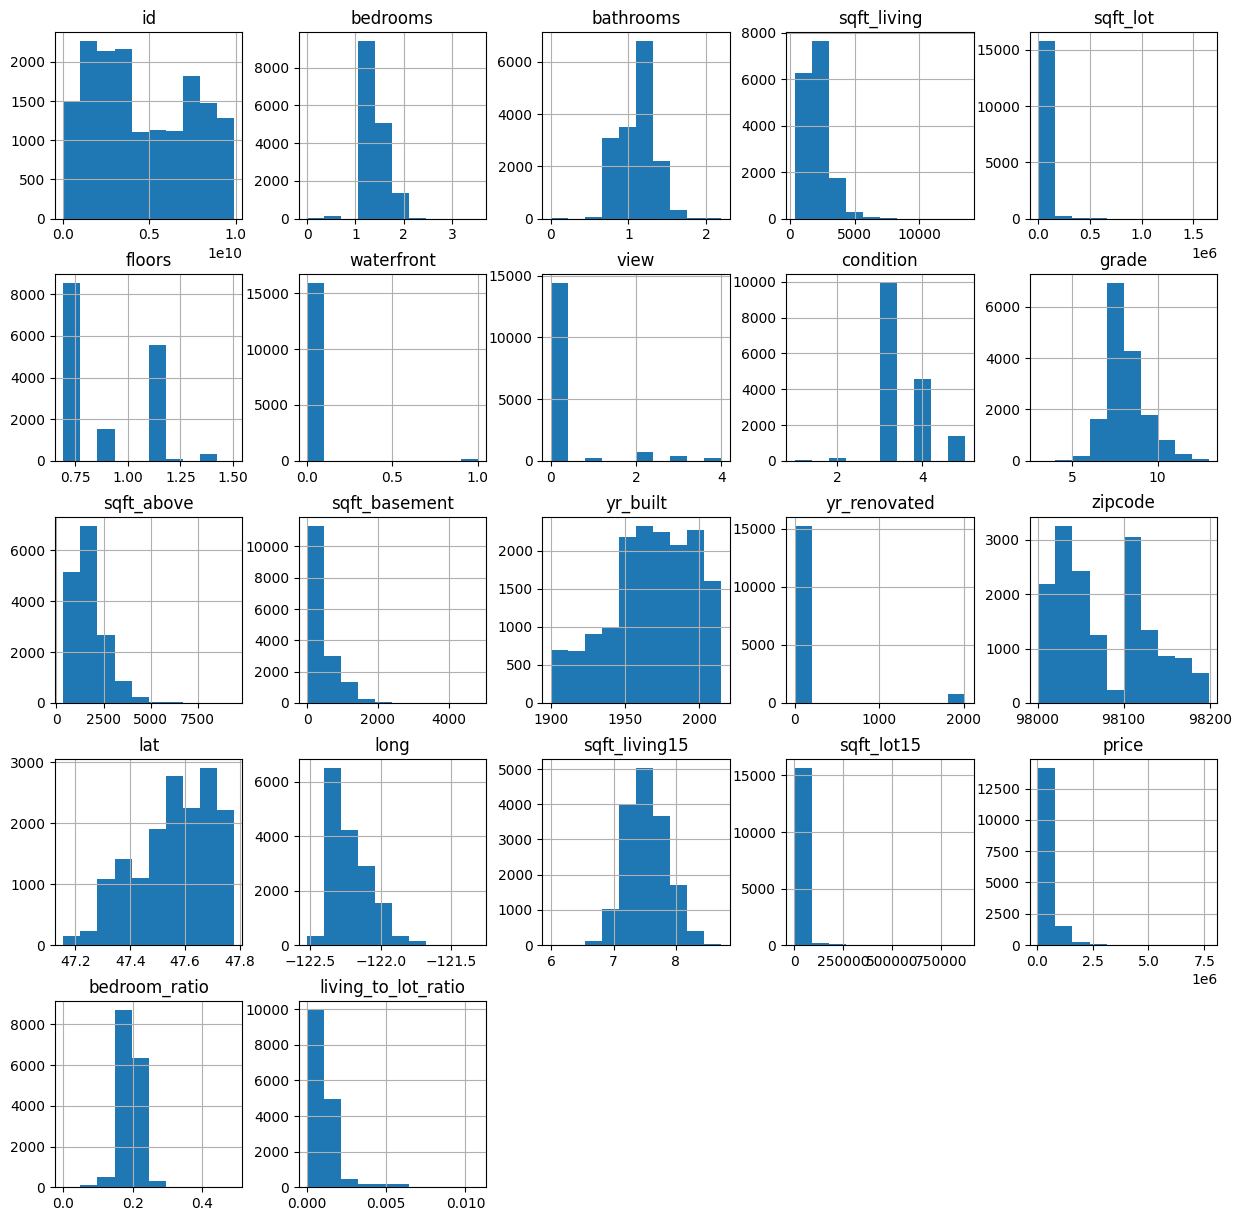

In [22]:
train_data.hist(figsize=(15,15))

<Axes: >

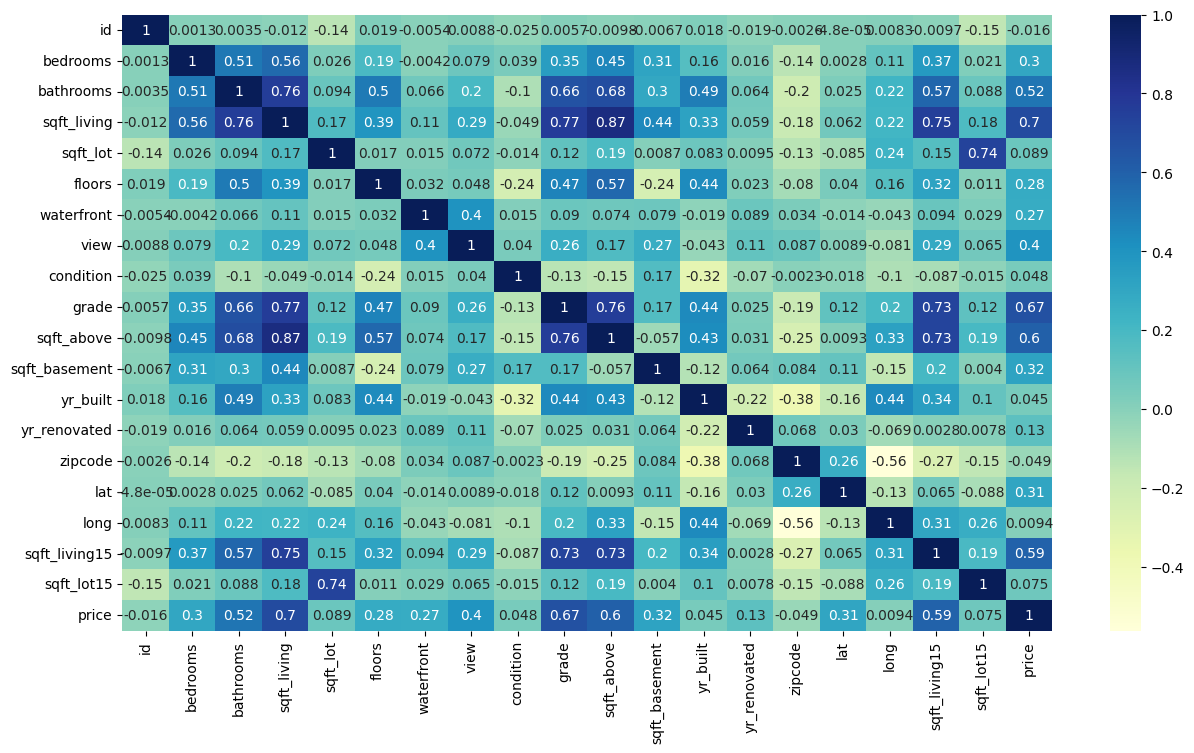

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

This shows that 'sqft_living' affects the 'price' the most

TIME FOR DATA PREPROCESSING

In [12]:
train_data['bedrooms'] = np.log(train_data['bedrooms'] + 1)
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['sqft_living15'] = np.log(train_data['sqft_living15'] + 1)
train_data['floors'] = np.log(train_data['floors'] + 1)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

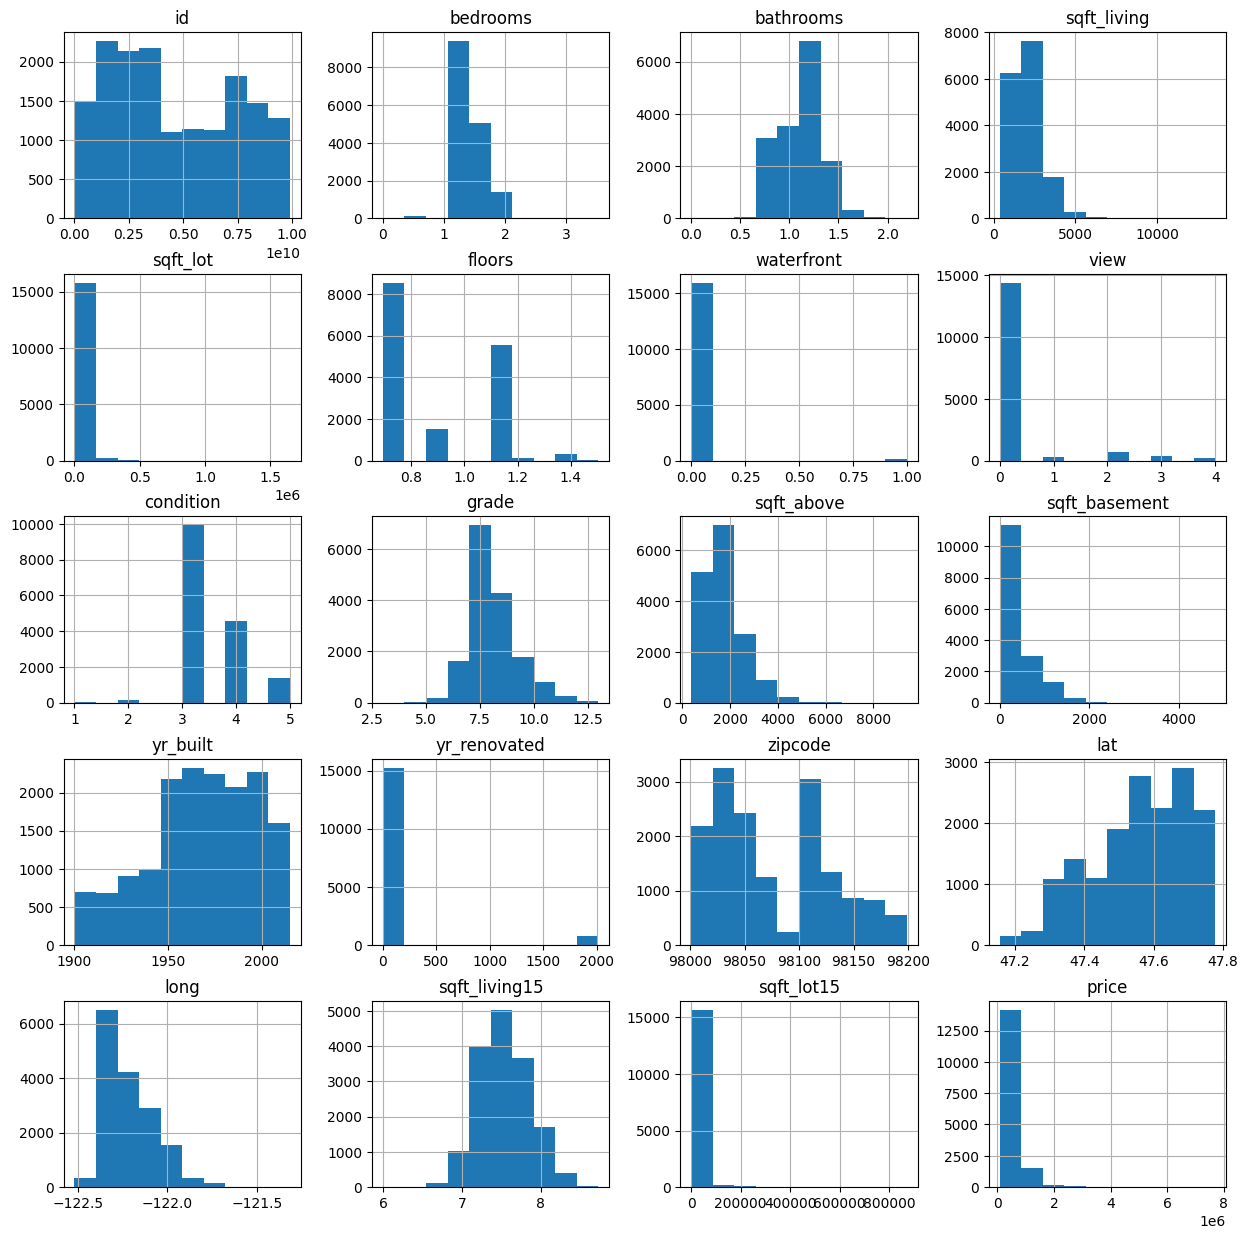

In [13]:
train_data.hist(figsize=(15,15))

Let's check how the house prices vary depending on the bedroom ratio with respect to the total living area

In [14]:
train_data['bedroom_ratio'] = train_data['bedrooms'] / train_data['sqft_living15']
train_data['living_to_lot_ratio'] = train_data['sqft_living15'] / train_data['sqft_lot15']

<Axes: >

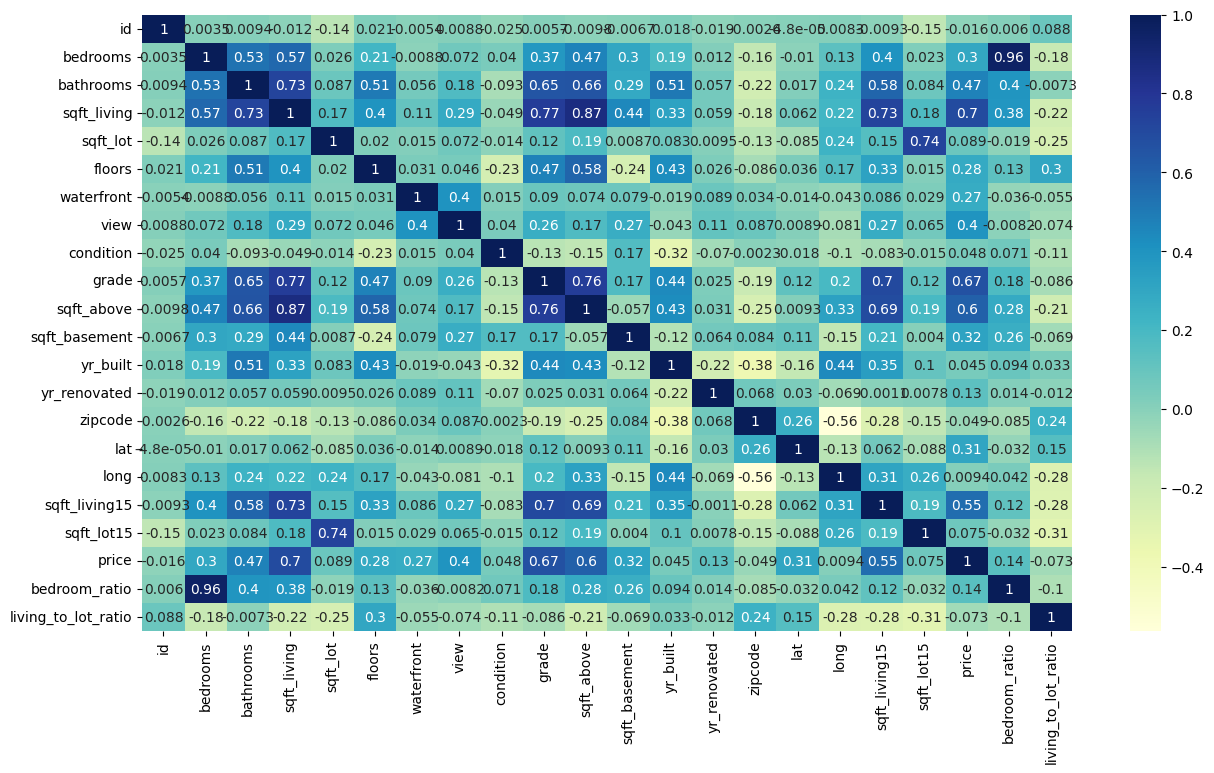

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [16]:
from sklearn.linear_model import LinearRegression

X_train = train_data.drop(['price'], axis = 1)

y_train = train_data['price']

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [17]:
test_data = X_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms'] + 1)
test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['sqft_living15'] = np.log(test_data['sqft_living15'] + 1)
test_data['floors'] = np.log(test_data['floors'] + 1)

test_data['bedroom_ratio'] = test_data['bedrooms'] / test_data['sqft_living15']
test_data['living_to_lot_ratio'] = test_data['sqft_living15'] / test_data['sqft_lot15']


In [18]:
X_test = test_data.drop(['price'], axis = 1)

y_test = test_data['price']

In [19]:
reg.score(X_test, y_test)

0.7095299553123527